###  Libraries

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_circles, make_moons
from sklearn.metrics.pairwise import pairwise_kernels
import math
import matplotlib.pyplot as plt

from tslearn.clustering import KernelKMeans
from InitialPartition import InitialPartition

c:\Users\PAPASOFT INC\AppData\Local\Programs\Python\Python311\Lib\site-packages\tslearn\bases\bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


### Global Variables

In [2]:
seed = 42

### Load Dataset

In [3]:
n_samples = 500

X, y = make_circles(n_samples=n_samples, factor=0.2, noise=0.05, random_state=seed)
len(np.where(np.array(y) == 1)[0])

# Find indices of samples with label 1
indices_label_1 = np.where(np.array(y) == 0)[0]

# Define the number of samples to remove
num_samples_to_remove = 0

# Randomly select indices to remove
indices_to_remove = np.random.choice(indices_label_1, size=num_samples_to_remove, replace=False)

# Remove selected samples
X = np.delete(X, indices_to_remove, axis=0)
y = np.delete(y, indices_to_remove)

# Number of samples after removal
print("Number of samples after removal:", len(X))
#X, y = make_moons(n_samples=n_samples, noise=0.1, random_state=seed)

Number of samples after removal: 400


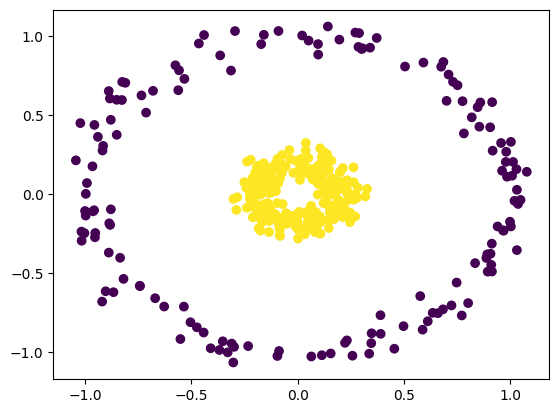

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y)

### We want a function that given the kernel and number of clusters to return me the initial partition using the kernel k-means++ algorithm

In [5]:
initialPartition = InitialPartition()

def find_cluster_indices(array, value):
    return np.where(np.array(array) == value)[0]

def custom_kernel_kmeans(X, centers_indices, initial_partition, kernel_matrix, max_iter=300, tol=1e-4):
    n_samples = X.shape[0]
    n_clusters = len(centers_indices)
    distances = np.zeros((n_clusters,n_samples))
    
    for iter in range(max_iter):
        
        for i in range(n_clusters):
            cluster_indices = find_cluster_indices(initial_partition, centers_indices[i])
            n_cluster_samples =  len(cluster_indices)
            stable_sum = (np.sum(kernel_matrix[k, l] for k in cluster_indices for l in cluster_indices)) / pow(n_cluster_samples, 2)
            
            for j in range(n_samples):
                sample_sum = np.sum(kernel_matrix[j,index] for index in cluster_indices) / n_cluster_samples
                distances[i,j] = kernel_matrix[j,j] - (2 * sample_sum) + stable_sum 
        
        min_distances = np.min(distances, axis=0)
        total_error = np.sum(min_distances)
        print(f"\n Total Error is: {total_error}!")
        
        next_partition = np.argmin(distances, axis=0)
        are_equal = np.array_equal(initial_partition, next_partition)
        if(are_equal):
            print(f"\n Finished in {iter} iterations!")
            return np.unique(next_partition), next_partition, total_error
        else:
            initial_partition = next_partition
            centers_indices = np.unique(next_partition)

# 6 are good
def kernel_kmeans_pp(X, K, kernel_matrix, n_init=6, method = 'KkMeans++'):
    min_total_error = math.inf

    for _ in range(n_init):
        centers_indices, partition = initialPartition.calculate_initial_partition(K, X, kernel_matrix, method)
        centers_indices, partition, total_error = custom_kernel_kmeans(X, centers_indices, initial_partition = partition, kernel_matrix=kernel_matrix, max_iter=300, tol=1e-4)
        print(f"\n centers_indices are: {centers_indices}!")
        if(total_error < min_total_error):
            min_total_error = total_error
            
            plt.scatter(X[:, 0], X[:, 1], c = partition)
            plt.show()

In [6]:
K = 2 
kernel_matrix = pairwise_kernels(X, X, metric='rbf', gamma=5)

c:\Users\PAPASOFT INC\AppData\Local\Programs\Python\Python311\Lib\site-packages\scikit_learn-1.3.1-py3.11-win-amd64.egg\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


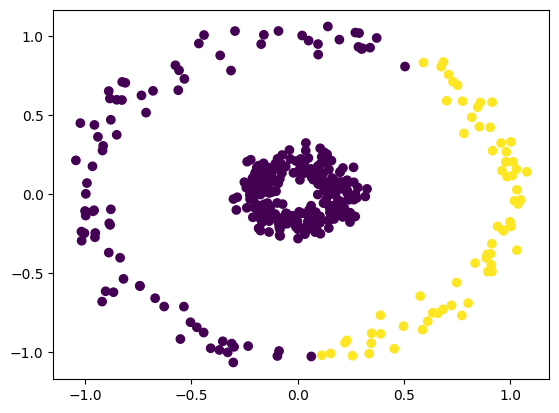

In [7]:
kmeans = KMeans(n_clusters=2).fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_)

c:\Users\PAPASOFT INC\AppData\Local\Programs\Python\Python311\Lib\site-packages\tslearn\utils\utils.py:90: UserWarning: 2-Dimensional data passed. Assuming these are 400 1-dimensional timeseries
  warnings.warn(


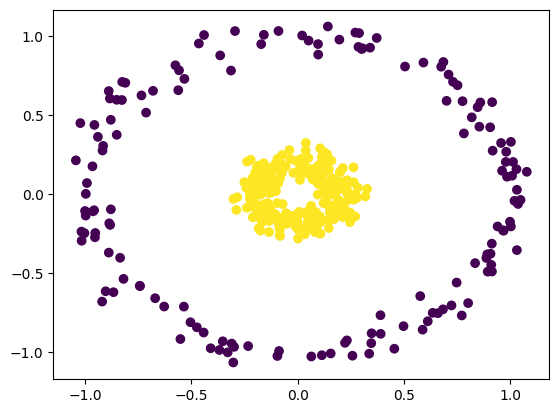

In [8]:
# Should find a way to init the fucking centers!
kernel_kmeans = KernelKMeans(n_clusters=2, n_init=1, kernel='precomputed').fit(kernel_matrix)
plt.scatter(X[:, 0], X[:, 1], c=kernel_kmeans.labels_)
plt.show()

Executing KkMeans++ Initialization

 centers_indices are: [0 1]!

 Total Error is: 251.76027789458496!

 Total Error is: 236.02459248248144!

 Total Error is: 210.86087673163772!

 Finished in 2 iterations!

 centers_indices are: [0 1]!


C:\Users\PAPASOFT INC\AppData\Local\Temp\ipykernel_21020\52798685.py:16: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  stable_sum = (np.sum(kernel_matrix[k, l] for k in cluster_indices for l in cluster_indices)) / pow(n_cluster_samples, 2)
C:\Users\PAPASOFT INC\AppData\Local\Temp\ipykernel_21020\52798685.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  sample_sum = np.sum(kernel_matrix[j,index] for index in cluster_indices) / n_cluster_samples


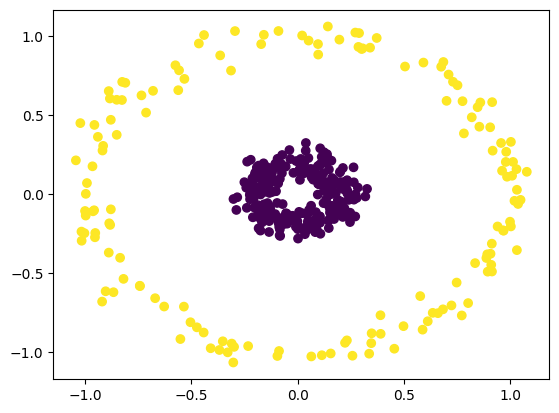

In [10]:
kernel_kmeans_pp(X, 2, kernel_matrix, n_init=1, method='KkMeans++')